<a href="https://colab.research.google.com/github/SeoMinJong/deep_learning/blob/main/beef_pork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import tensorflow as tf

In [2]:
df = pd.read_csv('C:/study_data/OneDrive-2021-07-18/Meat_dataset.csv')
df = df.iloc[:,1:8]

In [3]:
# df.drop(['income'],axis=1)

,price,meat_weight,delivery charge,meat_weight_100g,beef,pork
0,11800,6.0,3.0,1967,0,1
1,6800,3.0,0.0,2267,0,1
2,32100,10.0,0.0,3210,0,1
3,26000,10.0,3.0,2600,0,1
4,4500,4.0,2.5,1125,0,1
...,...,...,...,...,...,...
115,17960,12.0,0.0,1497,1,0
116,20490,9.0,0.0,2277,1,0
117,18410,5.0,3.0,3682,1,0
118,13630,15.0,0.0,909,1,0


In [4]:
beef_df = df['beef'] == 1
beef_df = df[beef_df]

pork_df = df['pork'] == 1
pork_df = df[pork_df]

In [5]:
display(beef_df)
display(pork_df)

,price,meat_weight,delivery charge,meat_weight_100g,income,beef,pork
60,157380,12.0,0.0,13115,0,1,0
61,27400,2.0,0.0,13700,0,1,0
62,26900,3.0,3.5,8967,0,1,0
63,36900,2.0,0.0,18450,0,1,0
64,46000,2.0,0.0,23000,0,1,0
65,38000,2.0,0.0,19000,0,1,0
66,71700,6.0,0.0,11950,0,1,0
67,26900,2.0,0.0,13450,0,1,0
68,89100,10.0,0.0,8910,0,1,0
69,214000,15.0,0.0,14267,0,1,0


,price,meat_weight,delivery charge,meat_weight_100g,income,beef,pork
0,11800,6.0,3.0,1967,0,0,1
1,6800,3.0,0.0,2267,0,0,1
2,32100,10.0,0.0,3210,0,0,1
3,26000,10.0,3.0,2600,0,0,1
4,4500,4.0,2.5,1125,0,0,1
5,19900,10.0,0.0,1990,0,0,1
6,13160,5.0,0.0,2632,0,0,1
7,14900,6.0,0.0,2483,0,0,1
8,17800,5.0,3.0,3560,0,0,1
9,16840,6.0,0.0,2807,0,0,1


AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755)


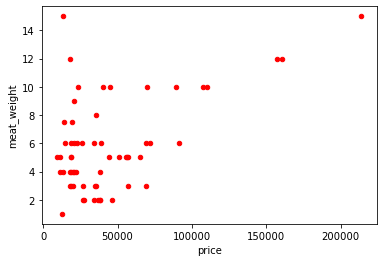

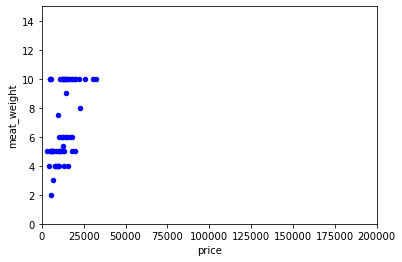

In [6]:
ax1 = beef_df.plot(kind='scatter', x='price', y='meat_weight', color='red')
ax2 = pork_df.plot(kind='scatter', x='price', y='meat_weight', color='blue')
plt.ylim(0,15)
plt.xlim(0,200000)

print(ax1 ,ax2)

In [7]:
input_cnt = 4
output_cnt = 2
train_raito = 0.8
mb_size = 12

In [8]:
MiniBath_step_count = int((df.shape[0] * train_raito) // mb_size)
MiniBath_step_count # 8개의 MiniBatch가 생길 수 있다.

8

In [9]:
test_start = MiniBath_step_count*mb_size
test_start

96

In [10]:
df = np.asarray(df, dtype='float32')
shuffle_map = np.arange(df.shape[0])
np.random.shuffle(shuffle_map)
df = df[shuffle_map]

In [11]:
train_df = df[:test_start]
test_df = df[test_start:]
display(train_df)
display(test_df)

array([[1.8910e+04, 6.0000e+00, 0.0000e+00, 3.1520e+03, 1.0000e+00,
        1.0000e+00, 0.0000e+00],
       [9.3100e+03, 5.0000e+00, 3.0000e+00, 1.8620e+03, 1.0000e+00,
        1.0000e+00, 0.0000e+00],
       [6.9000e+04, 3.0000e+00, 0.0000e+00, 2.3000e+04, 0.0000e+00,
        1.0000e+00, 0.0000e+00],
       [2.0900e+04, 6.0000e+00, 0.0000e+00, 3.4830e+03, 1.0000e+00,
        1.0000e+00, 0.0000e+00],
       [9.5700e+03, 5.0000e+00, 2.5000e+00, 1.9140e+03, 0.0000e+00,
        0.0000e+00, 1.0000e+00],
       [6.8800e+04, 6.0000e+00, 0.0000e+00, 1.1467e+04, 0.0000e+00,
        1.0000e+00, 0.0000e+00],
       [3.2100e+04, 1.0000e+01, 0.0000e+00, 3.2100e+03, 0.0000e+00,
        0.0000e+00, 1.0000e+00],
       [7.1700e+04, 6.0000e+00, 0.0000e+00, 1.1950e+04, 0.0000e+00,
        1.0000e+00, 0.0000e+00],
       [5.4300e+03, 5.0000e+00, 3.0000e+00, 1.0860e+03, 0.0000e+00,
        0.0000e+00, 1.0000e+00],
       [3.5400e+04, 8.0000e+00, 0.0000e+00, 4.4250e+03, 1.0000e+00,
        1.0000e+00, 0.0

array([[2.1400e+05, 1.5000e+01, 0.0000e+00, 1.4267e+04, 0.0000e+00,
        1.0000e+00, 0.0000e+00],
       [1.1010e+05, 1.0000e+01, 0.0000e+00, 1.1010e+04, 0.0000e+00,
        1.0000e+00, 0.0000e+00],
       [4.4800e+04, 1.0000e+01, 2.5000e+00, 4.4800e+03, 1.0000e+00,
        1.0000e+00, 0.0000e+00],
       [1.8900e+04, 4.0000e+00, 0.0000e+00, 4.7250e+03, 1.0000e+00,
        1.0000e+00, 0.0000e+00],
       [1.2930e+04, 1.0000e+00, 0.0000e+00, 1.2930e+04, 0.0000e+00,
        1.0000e+00, 0.0000e+00],
       [1.1900e+04, 1.0000e+01, 3.0000e+00, 1.1900e+03, 1.0000e+00,
        0.0000e+00, 1.0000e+00],
       [9.2000e+03, 4.0000e+00, 3.0000e+00, 2.3000e+03, 0.0000e+00,
        0.0000e+00, 1.0000e+00],
       [1.1310e+04, 4.0000e+00, 0.0000e+00, 2.8280e+03, 1.0000e+00,
        1.0000e+00, 0.0000e+00],
       [9.9400e+03, 4.0000e+00, 3.0000e+00, 2.4850e+03, 0.0000e+00,
        0.0000e+00, 1.0000e+00],
       [2.0490e+04, 9.0000e+00, 0.0000e+00, 2.2770e+03, 1.0000e+00,
        1.0000e+00, 0.0

In [12]:
train_X, train_y = train_df[:, :input_cnt], train_df[:, -output_cnt:]
test_X, test_y = test_df[:, :input_cnt], test_df[:, -output_cnt:]

In [13]:
display(train_X)
display(train_y)
display(test_X)
display(test_y)

array([[1.8910e+04, 6.0000e+00, 0.0000e+00, 3.1520e+03],
       [9.3100e+03, 5.0000e+00, 3.0000e+00, 1.8620e+03],
       [6.9000e+04, 3.0000e+00, 0.0000e+00, 2.3000e+04],
       [2.0900e+04, 6.0000e+00, 0.0000e+00, 3.4830e+03],
       [9.5700e+03, 5.0000e+00, 2.5000e+00, 1.9140e+03],
       [6.8800e+04, 6.0000e+00, 0.0000e+00, 1.1467e+04],
       [3.2100e+04, 1.0000e+01, 0.0000e+00, 3.2100e+03],
       [7.1700e+04, 6.0000e+00, 0.0000e+00, 1.1950e+04],
       [5.4300e+03, 5.0000e+00, 3.0000e+00, 1.0860e+03],
       [3.5400e+04, 8.0000e+00, 0.0000e+00, 4.4250e+03],
       [3.4440e+04, 6.0000e+00, 3.0000e+00, 5.7400e+03],
       [5.7000e+03, 2.0000e+00, 5.0000e+00, 2.8500e+03],
       [2.6000e+04, 1.0000e+01, 3.0000e+00, 2.6000e+03],
       [4.5000e+03, 4.0000e+00, 2.5000e+00, 1.1250e+03],
       [1.9900e+04, 1.0000e+01, 0.0000e+00, 1.9900e+03],
       [1.9900e+04, 3.0000e+00, 0.0000e+00, 6.6330e+03],
       [1.6840e+04, 6.0000e+00, 0.0000e+00, 2.8070e+03],
       [5.4300e+03, 5.0000e+00,

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

array([[2.1400e+05, 1.5000e+01, 0.0000e+00, 1.4267e+04],
       [1.1010e+05, 1.0000e+01, 0.0000e+00, 1.1010e+04],
       [4.4800e+04, 1.0000e+01, 2.5000e+00, 4.4800e+03],
       [1.8900e+04, 4.0000e+00, 0.0000e+00, 4.7250e+03],
       [1.2930e+04, 1.0000e+00, 0.0000e+00, 1.2930e+04],
       [1.1900e+04, 1.0000e+01, 3.0000e+00, 1.1900e+03],
       [9.2000e+03, 4.0000e+00, 3.0000e+00, 2.3000e+03],
       [1.1310e+04, 4.0000e+00, 0.0000e+00, 2.8280e+03],
       [9.9400e+03, 4.0000e+00, 3.0000e+00, 2.4850e+03],
       [2.0490e+04, 9.0000e+00, 0.0000e+00, 2.2770e+03],
       [8.1900e+03, 5.0000e+00, 3.0000e+00, 1.6380e+03],
       [5.6200e+03, 1.0000e+01, 3.0000e+00, 5.6200e+02],
       [5.5200e+03, 5.0000e+00, 3.0000e+00, 1.1040e+03],
       [1.4900e+04, 6.0000e+00, 0.0000e+00, 2.4830e+03],
       [5.0960e+04, 5.0000e+00, 0.0000e+00, 1.0192e+04],
       [1.0950e+04, 1.0000e+01, 0.0000e+00, 1.0950e+03],
       [6.5000e+04, 5.0000e+00, 0.0000e+00, 1.3000e+04],
       [1.5460e+04, 4.0000e+00,

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [14]:
# train_X_mean = np.mean(train_X, axis = 0)
# train_X_std  = train_X.std(axis = 0)

# train_X -= train_X_mean
# train_X /= train_X_std

# test_X -= train_X_mean
# test_X /= train_X_std

# print(train_X)

In [15]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=16,
                                                   activation='relu',
                                                   input_shape=(4,)),
                            tf.keras.layers.Dense(units=16,
                                                   activation='relu'),
                             tf.keras.layers.Dense(units=2,
                                                   activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 386
Trainable params: 386
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(train_X, train_y, epochs=100, batch_size=12)

Epoch 1/100
8/8 [==============================] - 0s 782us/step - loss: 1251.6860 - accuracy: 0.5000
Epoch 2/100
8/8 [==============================] - 0s 559us/step - loss: 883.3839 - accuracy: 0.5000
Epoch 3/100
8/8 [==============================] - 0s 570us/step - loss: 534.9962 - accuracy: 0.5000
Epoch 4/100
8/8 [==============================] - 0s 542us/step - loss: 184.0000 - accuracy: 0.5000
Epoch 5/100
8/8 [==============================] - 0s 570us/step - loss: 73.7165 - accuracy: 0.6771
Epoch 6/100
8/8 [==============================] - 0s 570us/step - loss: 50.6011 - accuracy: 0.5000
Epoch 7/100
8/8 [==============================] - 0s 570us/step - loss: 49.6032 - accuracy: 0.5312
Epoch 8/100
8/8 [==============================] - 0s 555us/step - loss: 52.5920 - accuracy: 0.4896
Epoch 9/100
8/8 [==============================] - 0s 571us/step - loss: 68.3679 - accuracy: 0.5625
Epoch 10/100
8/8 [==============================] - 0s 713us/step - loss: 37.9877 - accuracy: 0

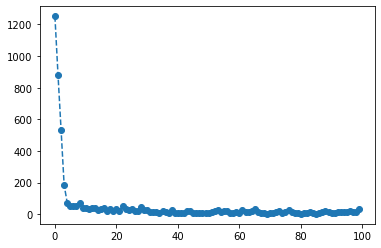

In [19]:
plt.plot(history.history['loss'],'--o')

In [20]:
pred = model.predict(test_X)
pred_y_max = np.argmax(pred, axis=1)
test_y_max = np.argmax(test_y, axis=1)

In [22]:
acc = np.mean(np.equal(pred_y_max,test_y_max))
print("ACC : {}".format(round(100*acc,8)))

ACC : 50.0
